In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

from src.bias_and_fairness_mitigation import BiasAndFairnessMitigation

data = fetch_openml(data_id=1590, as_frame=True)

X_raw = data.data
y_raw = data.target

`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df

In [2]:
X =  pd.get_dummies(X_raw)
y = (y_raw == ">50K") * 1

In [2]:
sensitive_features = {
    "race": "White",
    "sex": "Male",
    "native-country": "United-States",
    "relationship": "Husband",
}

## Mitigation

In [3]:
obj = BiasAndFairnessMitigation(X_raw, y_raw, ">50K", "reject_option_classification")
results = obj.describe_bias_and_fairness(sensitive_features)

In [4]:
obj2 = BiasAndFairnessMitigation(X_raw, y_raw, ">50K", "reweighing")
results_2 = obj2.describe_bias_and_fairness(sensitive_features)

c:\Users\I2044\Desktop\Projects\Bias _ Fairness\AIF360\src\bias_and_fairness_mitigation.py:348: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["", ""])
c:\Users\I2044\Desktop\Projects\Bias _ Fairness\AIF360\src\bias_and_fairness_mitigation.py:349: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=[0, "", 0.5, "", 1, "", 1.5, "", 2])
c:\Users\I2044\Desktop\Projects\Bias _ Fairness\AIF360\src\bias_and_fairness_mitigation.py:350: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["", ""])
c:\Users\I2044\Desktop\Projects\Bias _ Fairness\AIF360\src\bias_and_fairness_mitigation.py:351: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels=[-1, "", -0.5, "", 0, "", 0.5, "", 1])


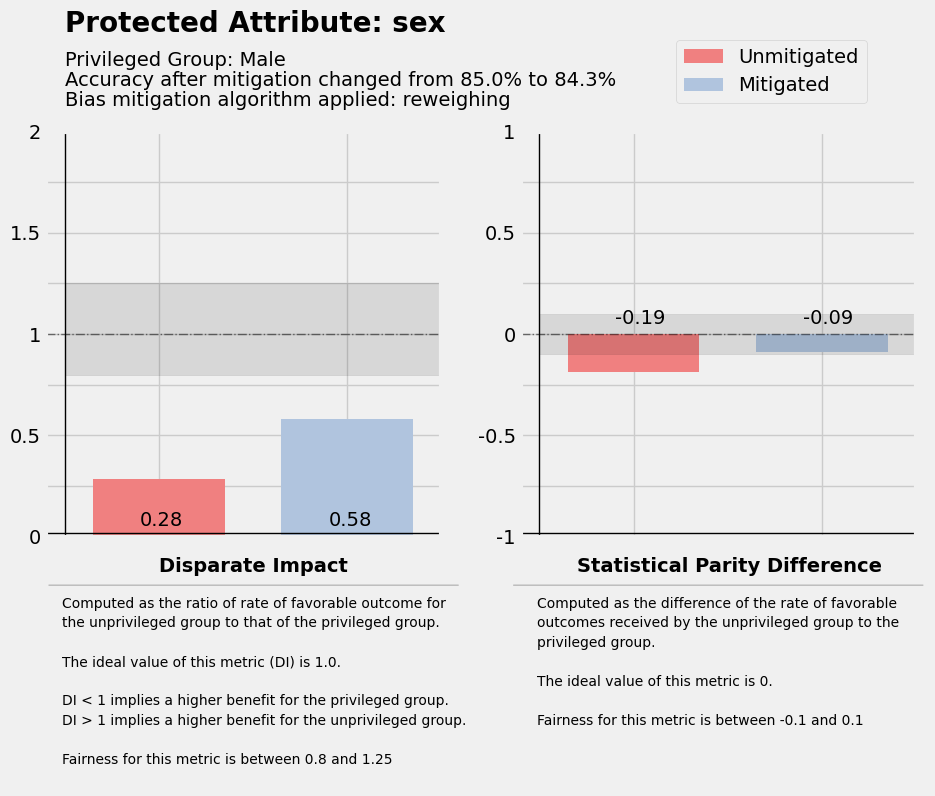

In [14]:
obj2.plot_bias_scores('sex')

c:\Users\I2044\Desktop\Projects\Bias _ Fairness\AIF360\src\bias_and_fairness_mitigation.py:348: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["", ""])
c:\Users\I2044\Desktop\Projects\Bias _ Fairness\AIF360\src\bias_and_fairness_mitigation.py:349: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=[0, "", 0.5, "", 1, "", 1.5, "", 2])
c:\Users\I2044\Desktop\Projects\Bias _ Fairness\AIF360\src\bias_and_fairness_mitigation.py:350: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["", ""])
c:\Users\I2044\Desktop\Projects\Bias _ Fairness\AIF360\src\bias_and_fairness_mitigation.py:351: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels=[-1, "", -0.5, "", 0, "", 0.5, "", 1])


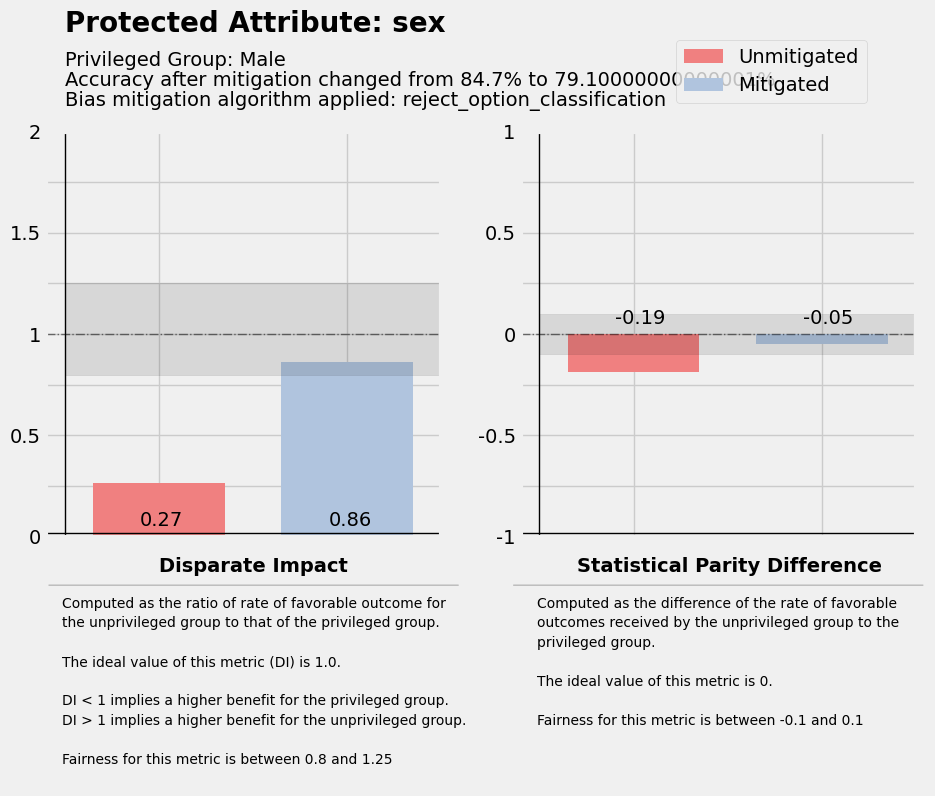

In [15]:
obj.plot_bias_scores('sex')

In [1]:
# preprocess_data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X =  pd.get_dummies(X_raw)
y = (y_raw == ">50K") * 1

SCALER = StandardScaler()
X = SCALER.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'pd' is not defined

In [ ]:
mitigation_strategy = 'reweighing'

obj = BiasFairnessEngine(X_train, y_train, sensitive_features, mitigation_strategy)
obj.diagnose_bias()
obj.plot_bias_scores('sex')

sample_weights = obj.mitigate_bias('sex')

lr = LogisticRegression()
lr.fit(X_train, y_train, sample_weights)
predictions = lr.predict(X_test)

In [ ]:
mitigation_strategy = 'reject_option_classification'

# Diagnose Bias
obj = BiasFairnessEngine(X_train, y_train, sensitive_features, mitigation_strategy)
obj.diagnose_bias()
obj.plot_bias_scores('sex')

# Mitigate Bias
ROC_MODEL = obj.mitigate_bias('sex')

lr = LogisticRegression()
lr.fit(X_train, y_train)
probability_scores = lr.predict_proba(X_test)

predictions = ROC_MODEL(X_test, probability_scores)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
# predictions = lr.predict(X_test)
obj = BiasFairnessEngine(X_train, y_train, sensitive_features, mitigation_strategy)
ROC_MODEL = obj.mitigate_bias('sex')

predictions = ROC_MODEL(X_test, lr)

In [ ]:
from aif360_wrapper.engine import BiasFairnessEngine
from aif360_wrapper.preprocessing import ReweighingDiagnosis, ReweighingMitigation
from aif360_wrapper.postprocessing import ROCDiagnosis, ROCMitigation



In [ ]:
# ML FLOW IN USING AIF360-PREPROCESSING ALGO (Eg. ReWeighing)
"""
## TRAINING
.
.
.
# preprocessing has already happened, data is ready to be ingested into model for training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25) # Simply X and y can also be used, depending on dev or prod scenario

sensitive_features = {"race":"white}
bias_model = BiasAndFairnessMitigation(X, y, sensitive_features, "reweighing")


"""